In [2]:
import pandas as pd

import numpy as np
import os

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, f1_score 
import pickle

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter  

from feature_engine.discretisation import EqualWidthDiscretiser
from sklearn.tree import DecisionTreeClassifier
import funciones

from feature_engine.discretisation import DecisionTreeDiscretiser

In [3]:
datos = pd.read_csv('/home/juan/proyectoTesis/datasets/boson_highs.csv')

In [4]:
print(datos.shape)

datos.describe()

(68636, 30)


,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b.tag,...,jet4phi,jet4b.tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,id
count,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,...,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000
mean,0.528571,0.989390,-0.004752,-0.000865,0.998634,-0.004615,0.988293,-0.004521,0.001059,0.997492,...,-0.001390,0.989418,1.031975,1.022349,1.050091,1.010198,0.972071,1.031742,0.959118,34318.500000
std,0.499187,0.562599,1.005846,1.006407,0.597851,1.006065,0.473853,1.010098,1.007629,1.026956,...,1.007525,1.395692,0.648727,0.369765,0.166135,0.399576,0.521868,0.363594,0.313324,19813.650875
min,0.000000,0.274697,-2.434976,-1.742508,0.001283,-1.743944,0.140434,-2.968735,-1.741237,0.000000,...,-1.742691,0.000000,0.110875,0.310499,0.133012,0.295983,0.048125,0.362572,0.403166,1.000000
25%,0.000000,0.590204,-0.744166,-0.869156,0.578363,-0.877512,0.676977,-0.696157,-0.864770,0.000000,...,-0.874392,0.000000,0.791868,0.846218,0.985762,0.766271,0.671995,0.819659,0.770090,17159.750000
50%,1.000000,0.853738,-0.003950,0.003191,0.892574,-0.008968,0.892804,-0.002006,-0.006040,1.086538,...,-0.004703,0.000000,0.896056,0.950510,0.989726,0.916662,0.873269,0.947334,0.871402,34318.500000
75%,1.000000,1.234030,0.734318,0.869884,1.294878,0.867539,1.167717,0.689175,0.873302,2.173076,...,0.874380,3.101961,1.026683,1.083862,1.020199,1.141150,1.138059,1.138514,1.056399,51477.250000
max,1.000000,7.805887,2.433894,1.743236,7.998711,1.743229,6.534160,2.964723,1.741454,2.173076,...,1.743372,3.101961,16.131908,8.940148,4.565248,7.442589,8.407887,7.318191,6.015647,68636.000000


In [5]:
X = datos.drop('class', axis=1)
y= datos['class'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

print(y_test.value_counts())



porcentaje = 100 * y_train.value_counts()/len(y_train)

porcentaje

class
1    9070
0    8089
Name: count, dtype: int64


class
1    52.856616
0    47.143384
Name: count, dtype: float64

In [6]:
filas_con_nulos = datos[datos.isnull().any(axis=1)]

filas_duplicadas = datos[datos.duplicated(keep=False)]

print(filas_con_nulos)

print(filas_duplicadas)

Empty DataFrame
Columns: [class, lepton_pT, lepton_eta, lepton_phi, missing_energy_magnitude, missing_energy_phi, jet1pt, jet1eta, jet1phi, jet1b.tag, jet2pt, jet2eta, jet2phi, jet2b.tag, jet3pt, jet3eta, jet3phi, jet3b.tag, jet4pt, jet4eta, jet4phi, jet4b.tag, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb, id]
Index: []

[0 rows x 30 columns]
Empty DataFrame
Columns: [class, lepton_pT, lepton_eta, lepton_phi, missing_energy_magnitude, missing_energy_phi, jet1pt, jet1eta, jet1phi, jet1b.tag, jet2pt, jet2eta, jet2phi, jet2b.tag, jet3pt, jet3eta, jet3phi, jet3b.tag, jet4pt, jet4eta, jet4phi, jet4b.tag, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb, id]
Index: []

[0 rows x 30 columns]


In [7]:
columnas_disc = X_train.columns.to_list()

discretizador = DecisionTreeDiscretiser(bin_output="bin_number",
                                        cv=3,
                                        scoring="roc_auc",
                                        variables= columnas_disc, 
                                        regression=False)

discretizador.fit(X_train, y_train)

DecisionTreeDiscretiser(bin_output='bin_number', regression=False,
                        scoring='roc_auc',
                        variables=['lepton_pT', 'lepton_eta', 'lepton_phi',
                                   'missing_energy_magnitude',
                                   'missing_energy_phi', 'jet1pt', 'jet1eta',
                                   'jet1phi', 'jet1b.tag', 'jet2pt', 'jet2eta',
                                   'jet2phi', 'jet2b.tag', 'jet3pt', 'jet3eta',
                                   'jet3phi', 'jet3b.tag', 'jet4pt', 'jet4eta',
                                   'jet4phi', 'jet4b.tag', 'm_jj', 'm_jjj',
                                   'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb',
                                   'id'])

In [8]:
X_train_disc = discretizador.transform(X_train)
X_test_disc = discretizador.transform(X_test)

In [9]:
X_disc = discretizador.transform(X)

data = X_disc.join(y)

In [10]:
# 1. Obtener los tipos de datos
tipos_de_datos = data.dtypes

# 2. Obtener la cantidad de valores únicos (clases)
conteo_unicos = X_disc.nunique()

# 3. Combinarlos en un nuevo DataFrame de resumen
resumen_columnas = pd.DataFrame({
    'Tipo de Dato': tipos_de_datos,
    'Cantidad de Clases (Únicos)': conteo_unicos
})

# 4. Ordenar por la cantidad de clases para ver las peores primero
resumen_columnas = resumen_columnas.sort_values(by='Cantidad de Clases (Únicos)', ascending=False)

print("--- Resumen de Discretización de Columnas ---")
print(resumen_columnas)

--- Resumen de Discretización de Columnas ---
                         Tipo de Dato  Cantidad de Clases (Únicos)
jet4eta                         int64                         16.0
jet4pt                          int64                         16.0
missing_energy_magnitude        int64                         16.0
m_wwbb                          int64                         16.0
jet1pt                          int64                         16.0
m_wbb                           int64                         16.0
jet2eta                         int64                         16.0
m_lv                            int64                         16.0
m_jlv                           int64                         16.0
m_jjj                           int64                         16.0
m_bb                            int64                         16.0
lepton_pT                       int64                         16.0
id                              int64                         15.0
jet2pt          

In [11]:
#Prueba de tasa de inconsistencia


funciones.tasa_inconsistencia(data, 'missing_energy_magnitude', 'class')

0.44776793519435865

In [12]:
# FUNCION FITNESS BIOBJETIVO
def fitness_mod_nsga2(ga_instance, solution, solution_idx):
    # decodificar solucion 

    nombres_de_features = X_disc.columns.tolist()
    num_total_features = len(nombres_de_features)
    selected_features = []

    for i in range(len(solution)):
        if solution[i]==1:
            selected_features.append(columnas_disc[i])
    
    num_selected_features = len(selected_features)
    if not selected_features:
        return [0,0]
        
    # Llamar a tasa_inconsistencia
    inconsistency_rate = funciones.tasa_inconsistencia(
        df=X_disc.join(y), 
        subconjunto_caracteristicas=selected_features, 
        clase='class'
    )
    
    # Si inconsistency_rate es 0 (perfecto), el fitness sera maximo.
    fitness1 = 1.0 - inconsistency_rate

    fitness2=num_total_features - num_selected_features
    
    return [fitness1, fitness2]

In [13]:
def callback_generation(ga_instance):
    current_time = time.time()
    duration = current_time - ga_instance.last_execution_time
    
    print(f"Generación                : {ga_instance.generations_completed}")
    
    if hasattr(ga_instance, 'pareto_fronts') and ga_instance.pareto_fronts and len(ga_instance.pareto_fronts) > 0:
        
        # 1. Obtener los índices de las soluciones en el mejor frente
        indices_del_mejor_frente = ga_instance.pareto_fronts[0][:, 0].astype(int)
        
        # 2. Obtener las soluciones y sus fitness ya calculados
        soluciones_del_frente = ga_instance.population[indices_del_mejor_frente]
        fitness_del_frente = ga_instance.last_generation_fitness[indices_del_mejor_frente]
        
        # 3. Calcular el rango del número de características
        num_features_en_frente = [np.sum(sol) for sol in soluciones_del_frente]
        
        print(f"Soluciones en Frente Pareto : {len(soluciones_del_frente)}")
        
        if num_features_en_frente:
            print(f"  - Rango de Características: de {min(num_features_en_frente):.0f} a {max(num_features_en_frente):.0f}")
        
        # --- NUEVA LÓGICA: CALCULAR Y MOSTRAR RANGO DE FITNESS ---
        if fitness_del_frente.size > 0:
            # Separamos los valores de fitness para cada objetivo
            # fitness_del_frente[:, 0] contiene todos los valores del primer objetivo
            # fitness_del_frente[:, 1] contiene todos los valores del segundo objetivo
            
            # Rango para el Objetivo 1 (Consistencia)
            min_fitness_obj1 = np.min(fitness_del_frente[:, 0])
            max_fitness_obj1 = np.max(fitness_del_frente[:, 0])
            
            # Rango para el Objetivo 2 (Simplicidad)
            min_fitness_obj2 = np.min(fitness_del_frente[:, 1])
            max_fitness_obj2 = np.max(fitness_del_frente[:, 1])

            print(f"  - Rango Fitness (Obj. 1)  : de {min_fitness_obj1:.8f} a {max_fitness_obj1:.8f}")
            print(f"  - Rango Fitness (Obj. 2)  : de {min_fitness_obj2:.0f} a {max_fitness_obj2:.0f}")
        # --- FIN DE LA NUEVA LÓGICA ---

    print(f"Duración de la Generación : {duration:.2f} segundos")
    print("------------------------------------------")
    
    ga_instance.last_execution_time = current_time

In [14]:
import pygad

#Algoritmo genetico para la seleccion de variables.
ga_instance = pygad.GA(
    num_generations=20,
    num_parents_mating=30, #numero de padres que seran seleccionados para reproducirse.
    parent_selection_type="tournament_nsga2",
    K_tournament= 2,
    sol_per_pop=30,
    num_genes=len(X_disc.columns),
    gene_space=[0, 1],
    mutation_type="random",
    mutation_probability = 0.000358, #1% para cada cromosoma, 
    fitness_func=fitness_mod_nsga2,
    save_solutions=True,
    on_generation=callback_generation
)


/home/juan/miniconda3/envs/py310/lib/python3.10/site-packages/pygad/pygad.py:1158: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.")


In [15]:
cardinalidad_cromosomas_poblacion_inicial = []
for cromosoma in ga_instance.population:
    num_caracteristicas= np.sum(cromosoma)
    cardinalidad_cromosomas_poblacion_inicial.append(num_caracteristicas)



promedio_cardinalidad = np.sum(cardinalidad_cromosomas_poblacion_inicial)/len(ga_instance.population[0])

print(f"El promedio de cardinalidad de la poblacion generada aleatoriamente es: {promedio_cardinalidad}")

El promedio de cardinalidad de la poblacion generada aleatoriamente es: 15.89655172413793


In [16]:
# Iterar sobre la población inicial almacenada en la instancia
for i, solution in enumerate(ga_instance.initial_population):
    
    # Llamar a tu función de fitness manualmente para cada solución
    fitness_values = fitness_mod_nsga2(ga_instance, solution, i)
    
    # De nuevo, asumimos que la tasa de inconsistencia es el primer objetivo ([0])
    tasa_inconsistencia = 1 - fitness_values[0] 
    
    print(f"Solución {i}: Tasa de Inconsistencia = {tasa_inconsistencia:.4f}")

    selected_features = []
    for gene_idx, gene_val in enumerate(solution):
        if gene_val == 1:
    # Usamos la lista 'columnas_disc' para obtener el nombre
            selected_features.append(columnas_disc[gene_idx])

    print(f"   Variables({len(selected_features)}): {selected_features}")


Solución 0: Tasa de Inconsistencia = 0.0020
   Variables(16): ['lepton_pT', 'lepton_phi', 'missing_energy_magnitude', 'jet1pt', 'jet1b.tag', 'jet2pt', 'jet2eta', 'jet2phi', 'jet3phi', 'jet4eta', 'jet4phi', 'm_jj', 'm_jjj', 'm_lv', 'm_bb', 'm_wwbb']
Solución 1: Tasa de Inconsistencia = 0.0001
   Variables(19): ['lepton_pT', 'lepton_eta', 'lepton_phi', 'jet1pt', 'jet1eta', 'jet1b.tag', 'jet2pt', 'jet2eta', 'jet2phi', 'jet3eta', 'jet3b.tag', 'jet4eta', 'm_jj', 'm_jjj', 'm_lv', 'm_bb', 'm_wbb', 'm_wwbb', 'id']
Solución 2: Tasa de Inconsistencia = 0.0021
   Variables(15): ['lepton_pT', 'lepton_eta', 'missing_energy_phi', 'jet1phi', 'jet1b.tag', 'jet2pt', 'jet2phi', 'jet3pt', 'jet3eta', 'jet4pt', 'jet4eta', 'jet4b.tag', 'm_jjj', 'm_jlv', 'm_bb']
Solución 3: Tasa de Inconsistencia = 0.0361
   Variables(12): ['lepton_pT', 'lepton_eta', 'missing_energy_magnitude', 'jet1pt', 'jet1eta', 'jet1b.tag', 'jet2phi', 'jet4eta', 'jet4phi', 'm_jj', 'm_wbb', 'm_wwbb']


KeyboardInterrupt: 

In [ ]:
funciones.tasa_inconsistencia(data, [ 'missing_energy_magnitude', 'm_jjj' ], 'class')

0.41096509120578123

In [ ]:
data =X_disc.join(y)
feature_columns = [col for col in data.columns if col != 'class']

print("---  Tasa de Inconsistencia por Atributo Individual ---")

# Diccionario para guardar los resultad
tasas_individuales = {}

for feature in feature_columns:
    
  
    
    rate = funciones.tasa_inconsistencia(
        df=data, 
        subconjunto_caracteristicas=[feature], 
        clase='class'
    )
    
    tasas_individuales[feature] = rate
    print(f"Feature: {feature:<30} | Tasa Inc: {rate:.5f}")

print("---------------------------------------------------------")

---  Tasa de Inconsistencia por Atributo Individual ---
Feature: lepton_pT                      | Tasa Inc: 0.45666
Feature: lepton_eta                     | Tasa Inc: 0.47064
Feature: lepton_phi                     | Tasa Inc: 0.47143
Feature: missing_energy_magnitude       | Tasa Inc: 0.44777
Feature: missing_energy_phi             | Tasa Inc: 0.47104
Feature: jet1pt                         | Tasa Inc: 0.45523
Feature: jet1eta                        | Tasa Inc: 0.47143
Feature: jet1phi                        | Tasa Inc: 0.47083
Feature: jet1b.tag                      | Tasa Inc: 0.47082
Feature: jet2pt                         | Tasa Inc: 0.47009
Feature: jet2eta                        | Tasa Inc: 0.47004
Feature: jet2phi                        | Tasa Inc: 0.47143
Feature: jet2b.tag                      | Tasa Inc: 0.47143
Feature: jet3pt                         | Tasa Inc: 0.47118
Feature: jet3eta                        | Tasa Inc: 0.47104
Feature: jet3phi                        | Ta

In [25]:
#inicializar marca de tiempo

import time
ga_instance.last_execution_time = time.time()

ga_instance.run()

Generación                : 1
Soluciones en Frente Pareto : 9
  - Rango de Características: de 10 a 22
  - Rango Fitness (Obj. 1)  : de 0.82869048 a 1.00000000
  - Rango Fitness (Obj. 2)  : de 7 a 19
Duración de la Generación : 1322.95 segundos
------------------------------------------
Generación                : 2
Soluciones en Frente Pareto : 10
  - Rango de Características: de 10 a 23
  - Rango Fitness (Obj. 1)  : de 0.90134915 a 1.00000000
  - Rango Fitness (Obj. 2)  : de 6 a 19
Duración de la Generación : 548.20 segundos
------------------------------------------
Generación                : 3
Soluciones en Frente Pareto : 9
  - Rango de Características: de 9 a 21
  - Rango Fitness (Obj. 1)  : de 0.89397692 a 0.99997086
  - Rango Fitness (Obj. 2)  : de 8 a 20
Duración de la Generación : 504.27 segundos
------------------------------------------
Generación                : 4
Soluciones en Frente Pareto : 8
  - Rango de Características: de 9 a 21
  - Rango Fitness (Obj. 1)  : de 0.8

In [26]:
#Distribuciones de fitness de la ultima generacion

ga_instance.save(filename="NSGA2-boson-highs-v1-20generations")

fitness_values = ga_instance.last_generation_fitness

fitness_values 

array([[ 0.99998543, 13.        ],
       [ 0.9916079 , 18.        ],
       [ 0.99992715, 14.        ],
       [ 0.99919867, 16.        ],
       [ 0.99919867, 16.        ],
       [ 0.99919867, 16.        ],
       [ 0.99631389, 17.        ],
       [ 0.9916079 , 18.        ],
       [ 0.99969404, 15.        ],
       [ 0.99919867, 16.        ],
       [ 0.99998543, 13.        ],
       [ 0.99998543, 13.        ],
       [ 0.99998543, 13.        ],
       [ 0.99998543, 13.        ],
       [ 0.99965033, 15.        ],
       [ 0.99998543, 13.        ],
       [ 0.99965033, 15.        ],
       [ 0.9916079 , 18.        ],
       [ 0.99965033, 15.        ],
       [ 0.99631389, 17.        ],
       [ 0.9916079 , 18.        ],
       [ 0.99631389, 17.        ],
       [ 0.99919867, 16.        ],
       [ 0.9916079 , 18.        ],
       [ 0.99892185, 16.        ],
       [ 0.99906754, 16.        ],
       [ 0.99919867, 16.        ],
       [ 0.99965033, 15.        ],
       [ 0.99998543,

In [28]:
busqueda1 = pygad.load("/home/juan/proyectoTesis/algoritmos_geneticos/NSGA2-boson-highs-v1-20generations")

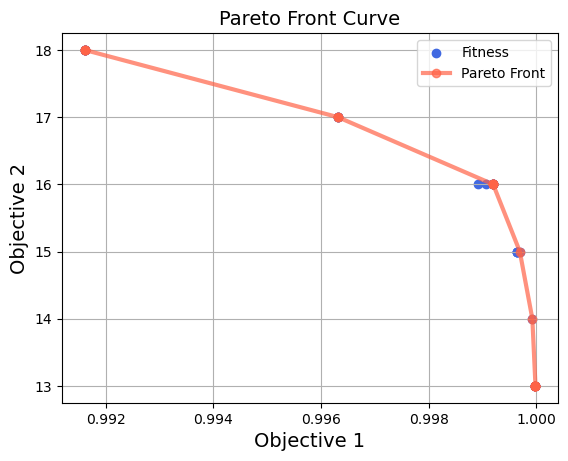

In [29]:
busqueda1.plot_pareto_front_curve();

In [56]:
################################Borrador de Tasa de Inconsistencia ###############################################################
subconjunto_caracteristicas = ['m_jjj']
m = len(data)

total_inconsistencias = 0 

grupos = data.groupby(subconjunto_caracteristicas)

In [58]:
print(grupos)